In [9]:
# import scipy.io as sio
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# def plot_eeg_and_sleep_stages(x, y, fs, ch_names, start_epoch=0, num_epochs=None):
#     """
#     Plot EEG data and corresponding sleep stages.
    
#     :param x: EEG data tensor of shape (epochs, channels, time)
#     :param y: Sleep stage labels tensor of shape (epochs,)
#     :param fs: Sampling frequency (Hz)
#     :param ch_names: List of EEG channel names
#     :param start_epoch: Starting epoch to plot (default 0)
#     :param num_epochs: Number of epochs to plot (default is all epochs)
#     """
#     if num_epochs is None:
#         num_epochs = x.shape[0]
    
#     start_epoch = max(0, min(start_epoch, x.shape[0] - num_epochs))
    
#     plot_x = x[start_epoch:start_epoch+num_epochs].numpy()
#     plot_y = y[start_epoch:start_epoch+num_epochs].numpy()
    
#     num_samples_per_epoch = plot_x.shape[2]
#     total_samples = num_epochs * num_samples_per_epoch
#     time_vector = np.arange(total_samples) / fs
    
#     fig, axs = plt.subplots(5, 1, figsize=(15, 12), sharex=False, gridspec_kw={'height_ratios': [3, 3, 3, 3, 1]})
#     fig.suptitle(f'EEG Data and Sleep Stages (Epochs {start_epoch} to {start_epoch+num_epochs-1})')
    
#     for i in range(4):
#         flattened_data = plot_x[:, i, :].flatten()
#         axs[i].plot(time_vector, flattened_data)
#         axs[i].set_ylabel(ch_names[i])
#         axs[i].set_xlim(0, total_samples / fs)
#         axs[i].set_ylim(flattened_data.min(), flattened_data.max())
    
#     stage_colors = ['purple', 'blue', 'green', 'yellow', 'red']  # Colors for N3, N2, N1, REM, Awake
#     cmap = ListedColormap(stage_colors)
    
#     epoch_duration = num_samples_per_epoch / fs
#     for i, stage in enumerate(plot_y):
#         start = i * epoch_duration
#         end = (i + 1) * epoch_duration
#         axs[4].axvspan(start, end, facecolor=stage_colors[int(stage)], alpha=0.7)
    
#     axs[4].set_yticks([])
#     axs[4].set_xlim(0, total_samples / fs)

#     print(f"Total Length of time in hours: {total_samples / fs / 3600:.2f}")

#     for i in range(5):  # Now including the sleep stage plot
#         axs[i].set_xlabel('Time (seconds)')

#     # Create legend elements
#     legend_elements = [plt.Rectangle((0,0),1,1, facecolor=stage_colors[i], alpha=0.7) 
#                        for i in range(5)]
    
#     # Add legend to the right side under the graph
#     fig.legend(legend_elements, ['N3', 'N2', 'N1', 'REM', 'Awake'], 
#                loc='lower right', bbox_to_anchor=(0.98, 0.02), ncol=1)
    
#     plt.tight_layout()
#     # Adjust the layout to make room for the legend
#     plt.subplots_adjust(bottom=0.1, right=.9)
#     return fig

# # Define the function to load data and call plot
# def load_and_plot(mat_file_path, start_epoch=0, num_epochs=None):
#     """
#     Loads a preprocessed .mat file and plots EEG data with corresponding sleep stages.
    
#     Args:
#         mat_file_path (str): Path to the .mat file containing the preprocessed sleep data.
#         start_epoch (int): Starting epoch to plot.
#         num_epochs (int): Number of epochs to plot.
#     """
#     # Load data from the .mat file
#     data = sio.loadmat(mat_file_path)
    
#     # Extract EEG signals, sampling frequency, channel names, and sleep stages
#     x = torch.tensor([data['sig1'], data['sig2'], data['sig3'], data['sig4']]).permute(1, 0, 2)
#     y = torch.tensor(data['labels'].flatten())
#     fs = data['Fs'][0][0]
#     ch_names = [name[0] for name in data['ch_names'][0]]
    
#     # Plot EEG and sleep stages
#     fig = plot_eeg_and_sleep_stages(x, y, fs, ch_names, start_epoch=start_epoch, num_epochs=num_epochs)
#     plt.show()
    
# # Usage
# # Replace 'path_to_preprocessed_data.mat' with the actual path to your .mat file
# load_and_plot('./preprocessing/preprocessed_data/preprocessed_data_201_N1.mat', start_epoch=500, num_epochs=1)

CUDA seed set on device NVIDIA TITAN V


/tmp/ipykernel_607232/894109480.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
2024-11-14 07:44:59,119 - INFO - 
Loading 


Evaluating Model Evaluation on New Data...


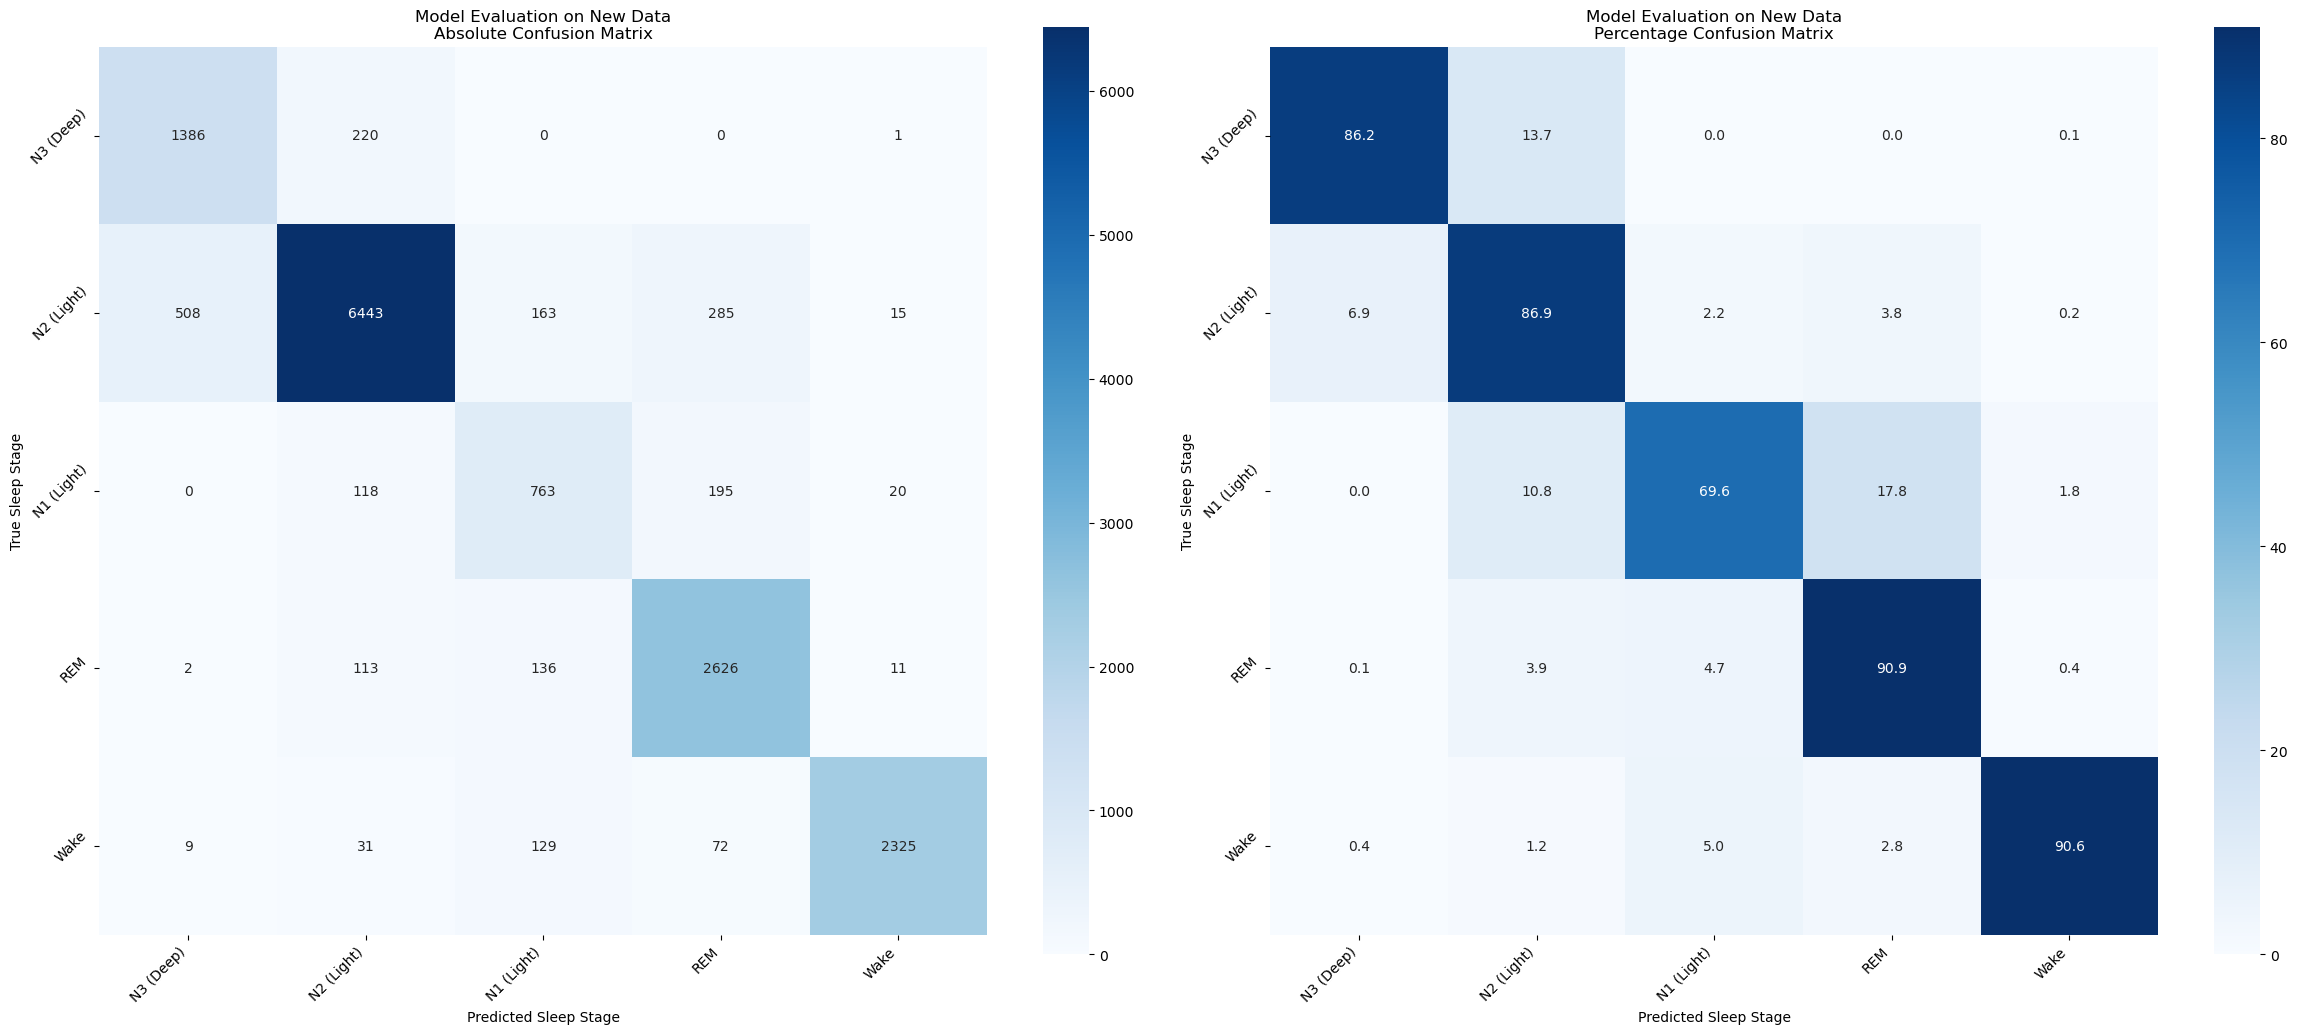


--------------------------------------------------
Model Evaluation on New Data Results:
--------------------------------------------------
Overall Accuracy: 87.0%
Macro F1-Score: 83.3%
Weighted F1-Score: 87.2%


,N3 (Deep),N2 (Light),N1 (Light),REM,Wake,Macro Avg,Weighted Avg
Precision,72.8%,93.0%,64.1%,82.6%,98.0%,82.1%,87.8%
Recall,86.2%,86.9%,69.6%,90.9%,90.6%,84.9%,87.0%
F1-Score,78.9%,89.9%,66.7%,86.6%,94.2%,83.3%,87.2%
Support,160700,741400,109600,288800,256600,1557100,1557100


2024-11-14 07:45:45,086 - INFO - 
Model Performance on New Data:
2024-11-14 07:45:45,087 - INFO - Total samples evaluated: 15571
2024-11-14 07:45:45,089 - INFO - Number of nights: 15
2024-11-14 07:45:45,090 - INFO - 
Class Distribution:
2024-11-14 07:45:45,096 - INFO - N3 (Deep): 1607 (10.3%)
    N2 (Light): 7414 (47.6%)
    N1 (Light): 1096 (7.0%)
    REM: 2888 (18.5%)
    Wake: 2566 (16.5%)


In [11]:

import os
import json
import torch
from tools_clean.config_clean import device, DATA_FILES, CONFIG, cuda_manager
from tools_clean.classes_clean import EnsembleModel, SleepDataManager, SleepStageEvaluator
from tools_clean.functions_clean import convert_to_serializable, format_class_distribution, set_seed
from tools_clean.utils_clean import *
import logging
from datetime import datetime
import pandas as pd

set_seed(CONFIG['settings']['seed'])


# device = torch.device("cuda:1")

def evaluate_new_data(model_dir, new_data_files, model_params=None, batch_size=32, save_results=True):
    """
    Evaluate a saved model on new data
    
    Args:
        model_dir: Directory containing the saved model and configuration
        new_data_files: List of paths to new .mat files to evaluate
        model_params: Optional model parameters (if None, loads from config)
        batch_size: Batch size for evaluation
    """
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    eval_dir = os.path.join(model_dir, f'evaluation')
    os.makedirs(eval_dir, exist_ok=True)
    
    # Load model configuration if not provided
    if model_params is None:
        config_path = os.path.join(model_dir, 'model_config.json')
        with open(config_path, 'r') as f:
            config = json.load(f)
            model_params = config['model_params']
    
    # Load model
    model_path = os.path.join(model_dir, 'best_model.pt')
    model = EnsembleModel(model_params).to(device)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    
    # Load new data
    logging.info(f"\nLoading new data from {len(new_data_files)} files...")
    data_manager = SleepDataManager(
        data_files=new_data_files,
        val_ratio=0.0,  # No validation split needed for evaluation
        seed=42
    )
    data_manager.load_and_preprocess()
    
    # Set up evaluator
    evaluator = SleepStageEvaluator(model_dir=eval_dir)
   

    # Evaluate on new data
    evaluation_results = evaluator.evaluate_model(
        model=model,
        X=data_manager.data['x'],
        X_spectral=data_manager.data['x_spectral'],
        y=data_manager.data['y'],
        model_name="Model Evaluation on New Data",
        batch_size=batch_size
    )
    
    if save_results:
        # Save data information
        data_info = {
            'n_nights': int(len(torch.unique(data_manager.data['night_idx']))),
            'n_samples': int(len(data_manager.data['y'])),
            'class_distribution': convert_to_serializable(
                Counter(data_manager.data['y'].numpy()).most_common()
            ),
            'data_files': new_data_files,
            'timestamp': timestamp
        }
        
        info_path = os.path.join(eval_dir, 'evaluation_info.json')
        with open(info_path, 'w') as f:
            json.dump(data_info, f, indent=4)
        
        # Save evaluation metrics
        if isinstance(evaluation_results.get('metrics'), pd.DataFrame):
            metrics_csv_path = os.path.join(eval_dir, 'evaluation_metrics.csv')
            evaluation_results['metrics'].to_csv(metrics_csv_path)
            evaluation_results['metrics'] = evaluation_results['metrics'].to_dict(orient='records')
        
        # Save other evaluation results
        eval_results = {
            'predictions': evaluation_results['predictions'].tolist(),
            'true_labels': evaluation_results['true_labels'].tolist(),
            'confusion_matrix_absolute': evaluation_results['confusion_matrix_absolute'].tolist(),
            'confusion_matrix_percentage': evaluation_results['confusion_matrix_percentage'].tolist()
        }
        
        eval_path = os.path.join(eval_dir, 'evaluation_results.json')
        with open(eval_path, 'w') as f:
            json.dump(eval_results, f, indent=4)
    
    # Log evaluation summary
    logging.info("\nModel Performance on New Data:")
    logging.info(f"Total samples evaluated: {len(data_manager.data['y'])}")
    logging.info(f"Number of nights: {len(torch.unique(data_manager.data['night_idx']))}")
    logging.info("\nClass Distribution:")
    logging.info(format_class_distribution(Counter(data_manager.data['y'].numpy())))
    
    return eval_dir, evaluation_results

# Example usage
new_data_files = DATA_FILES[60:76]
# Evaluate using a previously trained model
eval_dir, results = evaluate_new_data(
    model_dir='./models/new7/',
    new_data_files=new_data_files,
    batch_size=32,
    save_results=False
)




In [ ]:
# load one of the .mat files
# import scipy.io
# import numpy as np
# mat = scipy.io.loadmat('./preprocessing/preprocessed_data/preprocessed_data_201_N1.mat')
# print(mat.keys())
# # print(mat['labels'])
# # get unique labels
# np.unique(mat['labels'])

dict_keys(['__header__', '__version__', '__globals__', 'sig1', 'sig2', 'sig3', 'sig4', 'Fs', 'ch_names', 'labels'])


array([-1,  0,  1,  2,  3,  4])